<a href="https://colab.research.google.com/github/truong-xuan-linh/CS114.L21/blob/patch-1/predictScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đọc dữ liệu từ file CSV

In [5]:
import pandas as pd
# Đọc dữ liệu từ file csv
score = pd.read_csv("/content/drive/MyDrive/CS114/Predict_score/score_training.csv")
wecode = pd.read_csv("/content/drive/MyDrive/CS114/Predict_score/wecode.csv")
print('Chi tiết bảng wecode: ')
print(wecode)
print("Chi tiết bảng score:")
print(score)

Chi tiết bảng wecode: 
            id  assignment_id  ...           created_at           updated_at
0            4              0  ...  2020-10-30 10:58:11  2020-10-30 10:58:19
1            5              0  ...  2020-10-30 11:07:09  2020-10-30 11:07:17
2            6              0  ...  2020-10-30 11:08:01  2020-10-30 11:23:36
3            7              0  ...  2020-10-30 11:11:41  2020-10-30 11:11:42
4            8              0  ...  2020-10-30 11:15:06  2020-10-30 11:15:07
...        ...            ...  ...                  ...                  ...
264601  266667              0  ...  2021-04-28 09:34:20  2021-04-28 09:34:27
264602  266668              0  ...  2021-04-28 09:35:07  2021-04-28 09:35:08
264603  266669              0  ...  2021-04-28 09:35:15  2021-04-28 09:35:21
264604  266670              0  ...  2021-05-11 01:34:57  2021-05-11 01:35:28
264605  266671             21  ...  2021-05-13 17:17:17  2021-05-13 17:17:40

[264606 rows x 12 columns]
Chi tiết bảng score
     

# Xử lý bảng wecode

In [6]:
student = pd.DataFrame(wecode['user_id'])
student['num_problems'] = pd.DataFrame(wecode['is_final'])
student.insert(2,'num_submits', 1)
student['num_1000'] = pd.DataFrame(map(int, wecode['pre_score'] == 1000))
student.columns = ['id', 'num_problems', 'num_submits', 'num_1000']

student = student.groupby(['id']).sum()

Tạo bảng **student['id', 'num_problems', 'num_submits', 'num_1000']** từ bảng wecode với:

1.   id: id của sinh viên
2.   num_problems: Số lượng bài đã làm của sinh viên
3. num_submits: Số lượng bài đã nộp của sinh viên
4. num_1000: Số lượng bài đạt điểm tối đa của sinh viên



In [7]:
print(student)

      num_problems  num_submits  num_1000
id                                       
1                2            2         0
4               38           54         0
5                5            6         0
6               88          130         0
7                2            5         0
...            ...          ...       ...
1860            48           76         3
1862             6           12         0
1864            63          187         6
1865            17           99        21
1868            27           47         0

[1159 rows x 3 columns]


# Xử lý bảng score

In [12]:
# Xóa các cột không quan trọng từ file score, giữ lại id và CK
del score['QT'], score['GK'], score['TH'], score['TBM'], score['TBTL']
# Xóa những dòng trong score không chứa điểm CK
score = score.where(score['CK'] != '\xa0') # Xóa ' '
score = score.where(score['CK'] == score['CK']) # Xóa nan


Xóa những cột không quan trọng trong bảng score ban đầu, đưa về thành bảng **score['id', 'CK']**

In [13]:
print(score)

         id   CK
0      22.0  8.5
1      24.0  9.5
2      27.0   10
3      28.0  9.5
4      29.0  8.5
..      ...  ...
970  1857.0    4
971  1859.0  1.5
972  1862.0  7.5
973  1865.0  7.5
974  1866.0    5

[975 rows x 2 columns]


In [14]:
score['CK'] = pd.DataFrame(map(float,score['CK']))
score['CK']= score['CK'] + score['CK']

Vì dùng các class trong classifier phải là các số nguyên, nên ta đưa điểm cuối kì về thành 21 class số nguyên khác nhau từ 0-20

In [15]:
print(score)

         id    CK
0      22.0  17.0
1      24.0  19.0
2      27.0  20.0
3      28.0  19.0
4      29.0  17.0
..      ...   ...
970  1857.0   8.0
971  1859.0   3.0
972  1862.0  15.0
973  1865.0  15.0
974  1866.0  10.0

[975 rows x 2 columns]


# Tạo ra bộ data cuối cùng để train

In [16]:
data = pd.merge(student, score, how='inner', on=['id'])
print(data)

       id  num_problems  num_submits  num_1000    CK
0      24            77          164         4  19.0
1      27             5           13         3  20.0
2      29            80          199         2  17.0
3      34            84          218        11  13.0
4      35           151          297         3   9.0
..    ...           ...          ...       ...   ...
801  1856            31           64         6  15.0
802  1857            40           55         0   8.0
803  1859            30           31         0   3.0
804  1862             6           12         0  15.0
805  1865            17           99        21  15.0

[806 rows x 5 columns]


Merge hai bảng student và score lại với nhau dựa trên id

In [35]:
import numpy as np
X = np.array(data[['num_problems', 'num_submits', 'num_1000']], dtype= 'int64')
y = np.array(data['CK'], dtype= 'int64')#.reshape(-1,1)
print(X.shape)
print(y.shape)

(806, 3)
(806,)


X gồm các cột: num_problems, num_submits, num_1000

y gồm cột: CK 

# Visual data



*   Chấm đỏ: điểm trên 5
*   Chấm xanh: điểm dưới hoặc bằng 5



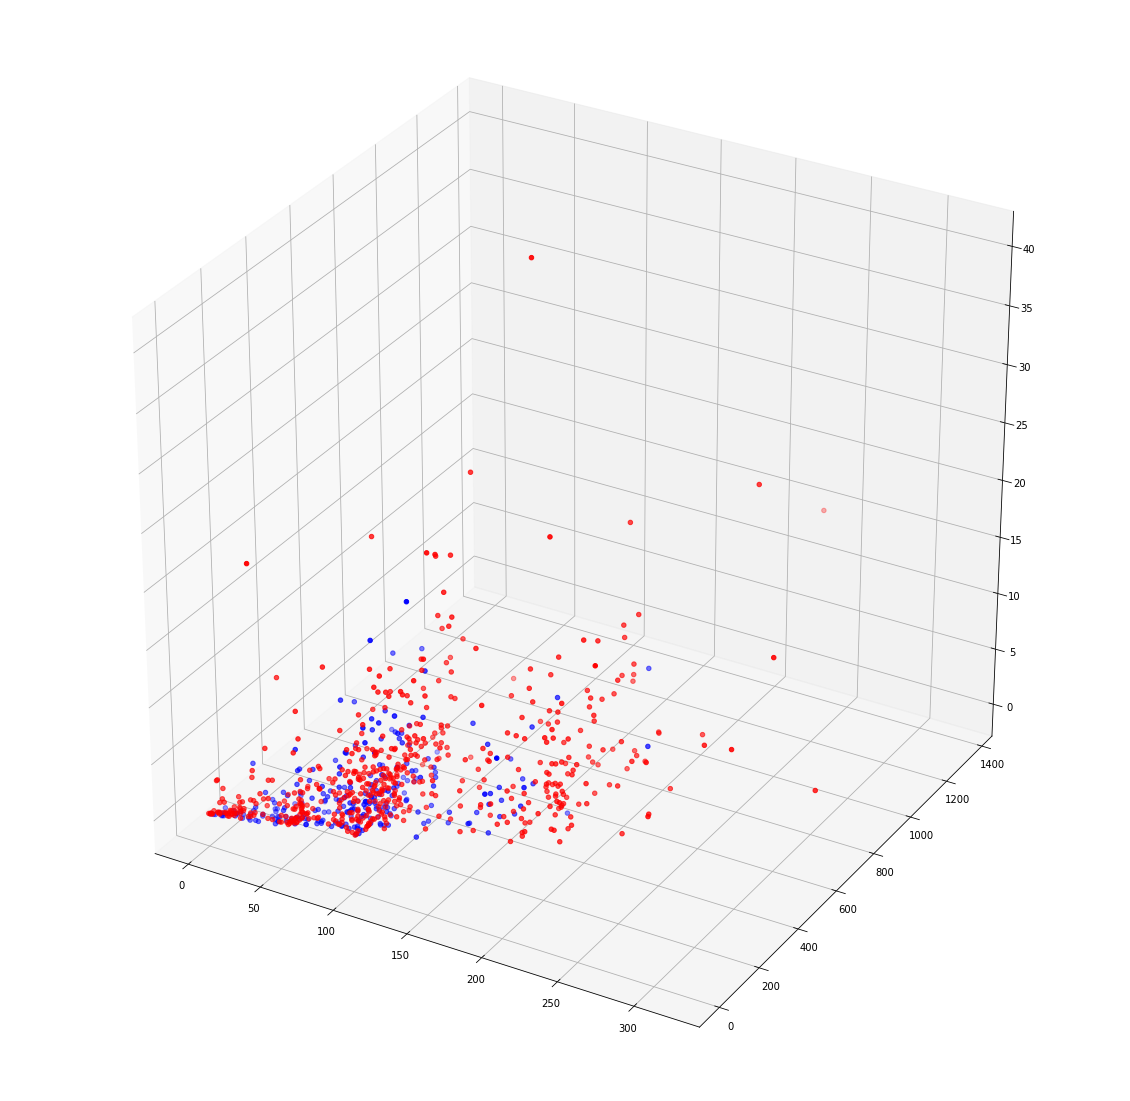

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot( projection='3d')
yft = y > 10
yft2 = y <=10
ax.scatter(X[yft,0], X[yft,1], X[yft,2], c= 'red') 
ax.scatter(X[yft2,0], X[yft2,1], X[yft2,2], c = 'blue')

plt.show()

Thử train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle = False)
#scaler = StandardScaler()
#scaler.fit(X_train)
model = svm.SVC()
model.fit(X_train, y_train)
predicted = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted))
#print(metrics.classification_report(y_test, predicted))
#metrics.plot_confusion_matrix(model, X_test, y_test)

0.13509316770186336


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
